# Measure waveforms

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qubecalib import QubeCalib
from qubecalib.neopulse import (
    Capture,
    Flushleft,
    RaisedCosFlatTop,
    Rectangle,
    Sequence,
    Series,
)

In [2]:
%matplotlib inline

In [3]:
# load the wiring settings
qc = QubeCalib("./wiring_settings.json")

In [4]:
# check the settings
qc.system_config_database.asdict()

{'clockmaster_setting': None,
 'box_settings': {'BOX1': {'ipaddr_wss': '10.1.0.73',
   'ipaddr_sss': '10.2.0.73',
   'ipaddr_css': '10.5.0.73',
   'boxtype': <Quel1BoxType.QuEL1_TypeA: ('quel-1', 'type-a')>,
   'config_root': None,
   'config_options': []}},
 'box_aliases': {},
 'port_settings': {'BOX1_READ_GEN': {'port_name': 'BOX1_READ_GEN',
   'box_name': 'BOX1',
   'port': 1,
   'ndelay_or_nwait': [0]},
  'BOX1_READ_CAP': {'port_name': 'BOX1_READ_CAP',
   'box_name': 'BOX1',
   'port': 0,
   'ndelay_or_nwait': [0, 0, 0, 0]},
  'BOX1_CTRL_0': {'port_name': 'BOX1_CTRL_0',
   'box_name': 'BOX1',
   'port': 2,
   'ndelay_or_nwait': [0, 0, 0]},
  'BOX1_CTRL_1': {'port_name': 'BOX1_CTRL_1',
   'box_name': 'BOX1',
   'port': 4,
   'ndelay_or_nwait': [0, 0, 0]},
  'BOX1_CTRL_2': {'port_name': 'BOX1_CTRL_2',
   'box_name': 'BOX1',
   'port': 9,
   'ndelay_or_nwait': [0, 0, 0]},
  'BOX1_CTRL_3': {'port_name': 'BOX1_CTRL_3',
   'box_name': 'BOX1',
   'port': 11,
   'ndelay_or_nwait': [0, 0, 0

In [5]:
# connect the box
box = qc.create_box("BOX1", reconnect=False)
if not all(box.link_status().values()):
    box.relinkup(use_204b=False, background_noise_threshold=400)
box.reconnect()

{0: True, 1: True}

In [6]:
# check the lsi settings
box.dump_box()

{'mxfes': {0: {'channel_interporation_rate': 4, 'main_interporation_rate': 6},
  1: {'channel_interporation_rate': 4, 'main_interporation_rate': 6}},
 'ports': {0: {'direction': 'in',
   'lo_freq': 8500000000,
   'cnco_freq': 1875000000.0,
   'rfswitch': 'open',
   'runits': {0: {'fnco_freq': 0.0},
    1: {'fnco_freq': 0.0},
    2: {'fnco_freq': 0.0},
    3: {'fnco_freq': 0.0}}},
  1: {'direction': 'out',
   'channels': {0: {'fnco_freq': 0.0}},
   'cnco_freq': 1875000000.0,
   'fullscale_current': 40527,
   'lo_freq': 8500000000,
   'sideband': 'U',
   'rfswitch': 'pass'},
  2: {'direction': 'out',
   'channels': {0: {'fnco_freq': 0.0},
    1: {'fnco_freq': 0.0},
    2: {'fnco_freq': 0.0}},
   'cnco_freq': 1781250000.0,
   'fullscale_current': 40527,
   'lo_freq': 9500000000,
   'sideband': 'L',
   'rfswitch': 'pass'},
  3: {'direction': 'out',
   'channels': {0: {'fnco_freq': 0.0}},
   'cnco_freq': 1500000000.0,
   'fullscale_current': 40527,
   'lo_freq': 12000000000,
   'sideband': 

## Capture noise

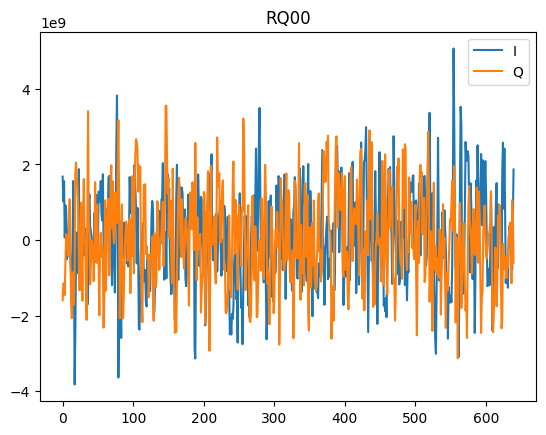

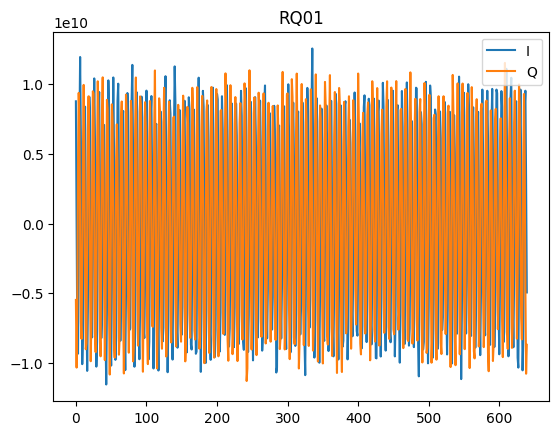

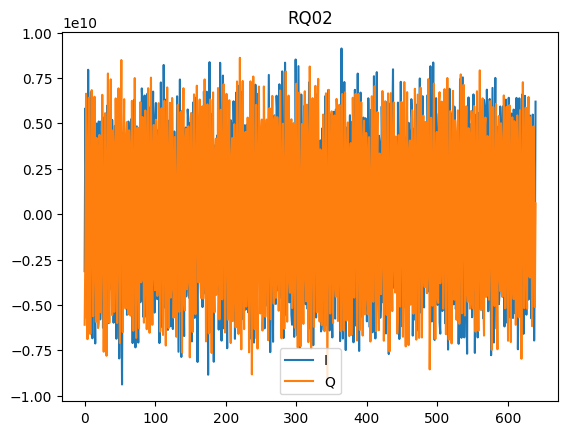

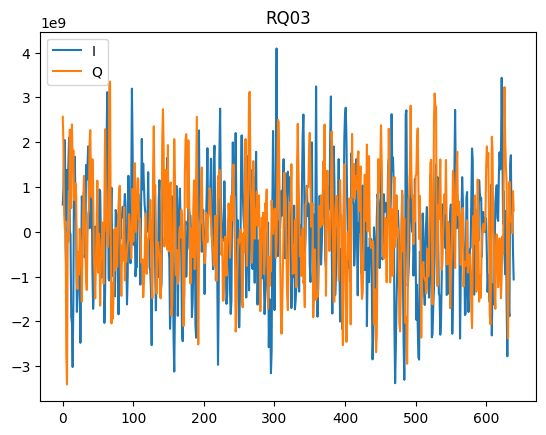

In [7]:
capture = Capture(duration=5 * 1024)

with Sequence() as seq:
    capture.target("RQ00")
    capture.target("RQ01")
    capture.target("RQ02")
    capture.target("RQ03")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=3000,
    interval=150 * 1024,
):
    for target, iqs in data.items():
        iq = iqs[0].squeeze()
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()


## Capture reflected waveforms

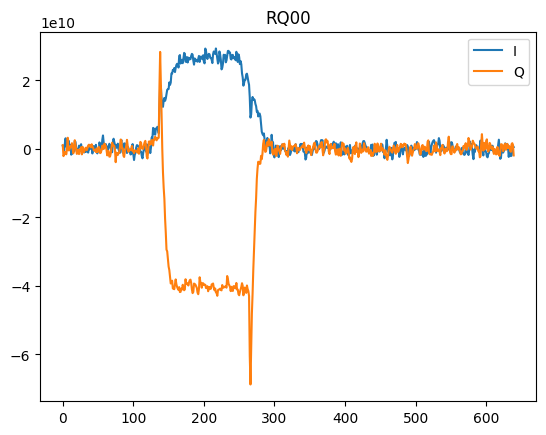

In [8]:
pulse = Rectangle(duration=1024, amplitude=0.1)
capture = Capture(duration=5 * 1024)

with Sequence() as seq:
    with Flushleft():
        with Series():
            pulse.target("RQ00")
        capture.target("RQ00")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=3000,
    interval=150 * 1024,
):
    for target, iqs in data.items():
        iq = iqs[0].squeeze()
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()

### Multiplexed

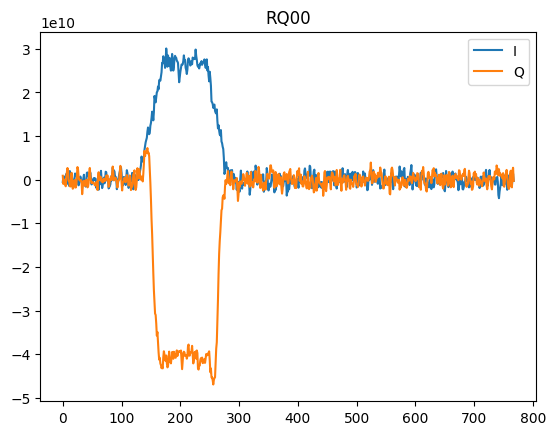

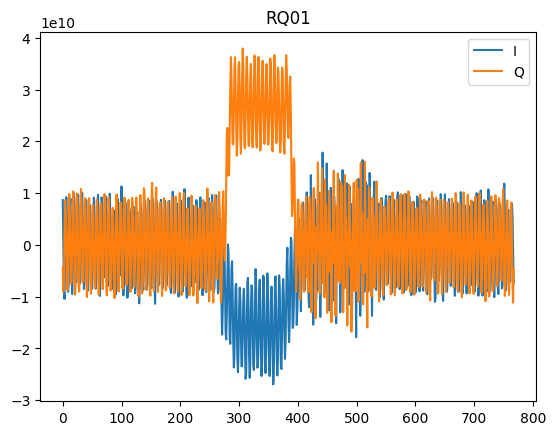

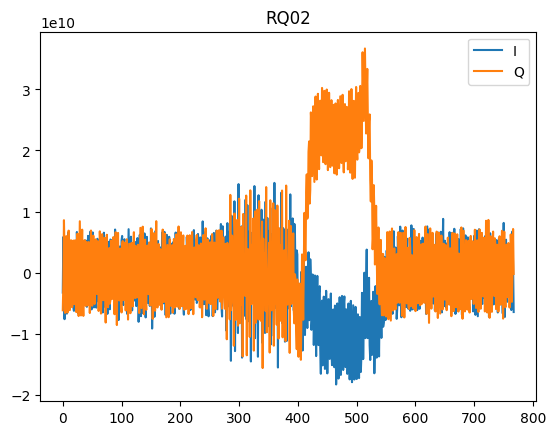

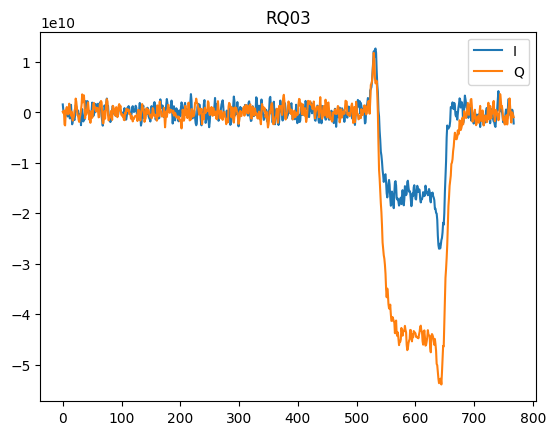

In [9]:
pulse = RaisedCosFlatTop(duration=1024, amplitude=0.1, rise_time=128)
capture = Capture(duration=6 * 1024)

with Sequence() as seq:
    with Flushleft():
        with Series():
            pulse.target("RQ00")
            pulse.target("RQ01")
            pulse.target("RQ02")
            pulse.target("RQ03")
        capture.target("RQ00")
        capture.target("RQ01")
        capture.target("RQ02")
        capture.target("RQ03")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=3000,
    interval=150 * 1024,
):
    for target, iqs in data.items():
        iq = iqs[0].squeeze()
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()

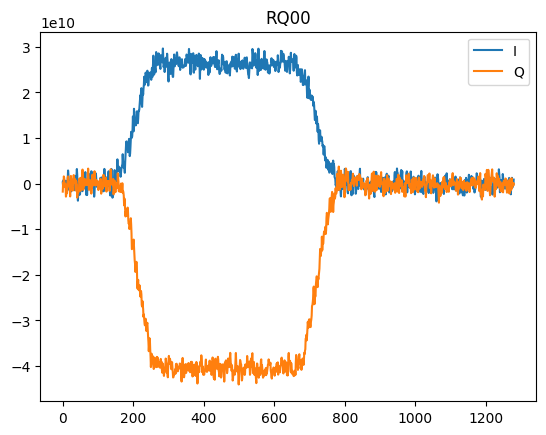

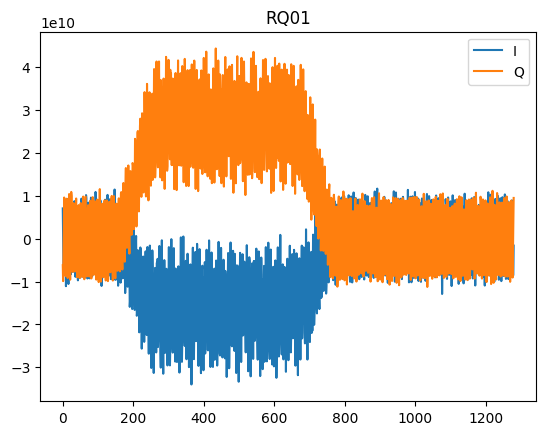

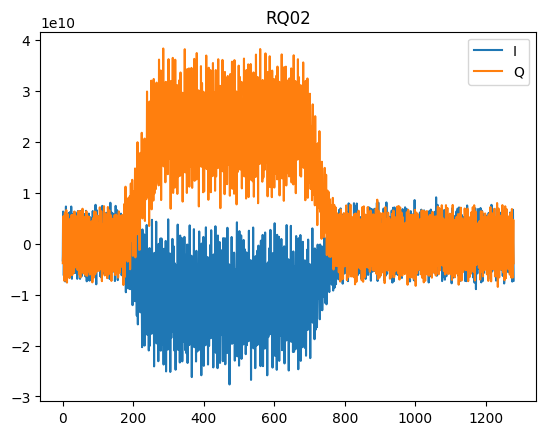

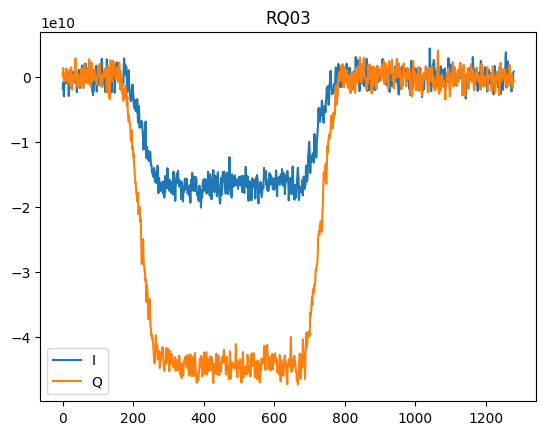

In [10]:
pulse = RaisedCosFlatTop(duration=5 * 1024, amplitude=0.1, rise_time=1024)
capture = Capture(duration=10 * 1024)

with Sequence() as seq:
    with Flushleft():
        pulse.target("RQ00")
        pulse.target("RQ01")
        pulse.target("RQ02")
        pulse.target("RQ03")
        capture.target("RQ00")
        capture.target("RQ01")
        capture.target("RQ02")
        capture.target("RQ03")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=3000,
    interval=150 * 1024,
):
    for target, iqs in data.items():
        iq = iqs[0].squeeze()
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()